In [81]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel("source.xlsx", sheet_name="All solids & liquids per 100g")
df1.head()

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,NaN
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN


In [57]:
df2 = pd.read_excel('source2.xlsx', sheet_name='AFCD - Release 2')
df = pd.merge(df1, df2, on="Public Food Key")
df.head

<bound method NDFrame.head of      Public Food Key  Classification_x  \
0            F002258           31302.0   
1            F002893           31302.0   
2            F002963           31302.0   
3            F002970           31302.0   
4            F003190           31302.0   
...              ...               ...   
1611         F009774           24702.0   
1612         F009773           24702.0   
1613         F009766           24702.0   
1614         F009765           24702.0   
1615         F009764           24702.0   

                                            Food Name_x  \
0                          Cardamom seed, dried, ground   
1                         Chilli (chili), dried, ground   
2                               Cinnamon, dried, ground   
3                                 Cloves, dried, ground   
4                         Coriander seed, dried, ground   
...                                                 ...   
1611  Zucchini, green skin, fresh, unpeeled, fried, 

In [59]:
# fill na
df.fillna(0, inplace=True)

# classification based on first word
df['Classification Name'] = df['Classification Name'].str.split(',').str[0]

df.groupby(['Classification Name']).mean()

,Classification_x,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Alcohol \n(g),...,Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg),Food Profile ID,Nitrogen Factor,Fat Factor,Specific Gravity,Classification_y
Classification Name,,,,,,,,,,,,,,,,,,,,,
Animal-based solid fats,14501.0,3703.000000,3703.000000,0.000000,0.200000,0.030000,100.000000,0.000000,0.00,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4470.000000,6.250000,0.956000,0.000000,14501.0
Apples,15958.5,227.300000,207.200000,84.820000,0.290000,0.048000,0.060000,0.240000,2.52,0.00000,...,2.000000,1.800000,1.000000,2.200000,2.000000,7738.700000,5.000000,0.640000,0.000000,15958.5
Bacon,18601.0,1604.500000,1604.500000,38.825000,22.150000,3.545000,32.925000,5.225000,0.00,0.00000,...,184.500000,197.250000,148.000000,245.750000,210.250000,14905.500000,6.250000,0.931500,0.000000,18601.0
Bananas,16501.0,434.000000,405.500000,72.500000,1.450000,0.230000,0.150000,1.000000,2.95,0.00000,...,75.500000,55.500000,44.000000,24.000000,67.500000,5976.500000,6.250000,0.800000,0.000000,16501.0
Beans,24502.0,437.818182,375.272727,68.109091,9.054545,1.449091,0.590909,1.263636,7.30,0.00000,...,290.636364,205.272727,159.818182,100.909091,314.909091,13660.727273,3.977273,0.509091,0.000000,24502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wild harvested vegetables,24001.0,448.000000,420.000000,68.000000,3.200000,0.510000,0.300000,2.000000,3.50,0.00000,...,0.000000,0.000000,0.000000,49.000000,0.000000,14828.000000,6.250000,0.800000,0.000000,24001.0
Wines,29201.5,299.125000,299.125000,87.093750,0.243750,0.038125,0.000000,0.225000,0.00,9.33125,...,0.000000,0.000000,0.000000,0.250000,0.000000,8330.437500,5.468750,0.700000,0.998125,29201.5
Yeast,31101.0,1126.000000,910.000000,6.000000,36.400000,5.820000,5.000000,4.800000,26.90,0.00000,...,0.000000,0.000000,0.000000,361.000000,0.000000,14741.000000,6.250000,0.800000,0.000000,31101.0


In [65]:
category = "Classification Name"
carbohydrates = "Available carbohydrate, with sugar alcohols \n(g)"
alcohol = 'Alcohol \n(g)'
proteins = 'Protein \n(g)'
fats = 'Fat, total \n(g)'
variables = [category,proteins,fats,carbohydrates,alcohol]

cl = df[variables].groupby(['Classification Name']).mean()
cl.reset_index(inplace=True)
cl

,Classification Name,Protein \n(g),"Fat, total \n(g)","Available carbohydrate, with sugar alcohols \n(g)",Alcohol \n(g)
0,Animal-based solid fats,0.200000,100.000000,0.000000,0.00000
1,Apples,0.290000,0.060000,12.060000,0.00000
2,Bacon,22.150000,32.925000,0.575000,0.00000
3,Bananas,1.450000,0.150000,22.300000,0.00000
4,Beans,9.054545,0.590909,11.672727,0.00000
...,...,...,...,...,...
204,Wild harvested vegetables,3.200000,0.300000,20.900000,0.00000
205,Wines,0.243750,0.000000,1.331250,9.33125
206,Yeast,36.400000,5.000000,6.300000,0.00000
207,Yeast extracts,18.850000,0.900000,13.750000,0.00000


In [88]:
from sklearn.preprocessing import StandardScaler

variables = [proteins,fats,carbohydrates]
x = cl[variables]
y = cl[category]
x

,Protein \n(g),"Fat, total \n(g)","Available carbohydrate, with sugar alcohols \n(g)"
0,0.200000,100.000000,0.000000
1,0.290000,0.060000,12.060000
2,22.150000,32.925000,0.575000
3,1.450000,0.150000,22.300000
4,9.054545,0.590909,11.672727
...,...,...,...
204,3.200000,0.300000,20.900000
205,0.243750,0.000000,1.331250
206,36.400000,5.000000,6.300000
207,18.850000,0.900000,13.750000


In [89]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2
0,-0.737903,4.412742,-0.875120
1,-0.729769,-0.576393,-0.326751
2,1.245697,1.064270,-0.848974
3,-0.624941,-0.571901,0.138863
4,0.062274,-0.549890,-0.344360
...,...,...,...
204,-0.466796,-0.564412,0.075205
205,-0.733949,-0.579389,-0.814588
206,2.533456,-0.329782,-0.588658
207,0.947479,-0.534460,-0.249906


In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratios for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio for PC{i+1}: {ratio:.3f}")

# Print cumulative explained variance ratios
for i, ratio in enumerate(cumulative_explained_variance_ratio):
    print(f"Cumulative explained variance up to PC{i+1}: {ratio:.3f}")

Explained variance ratio for PC1: 0.384
Explained variance ratio for PC2: 0.342
Cumulative explained variance up to PC1: 0.384
Cumulative explained variance up to PC2: 0.726


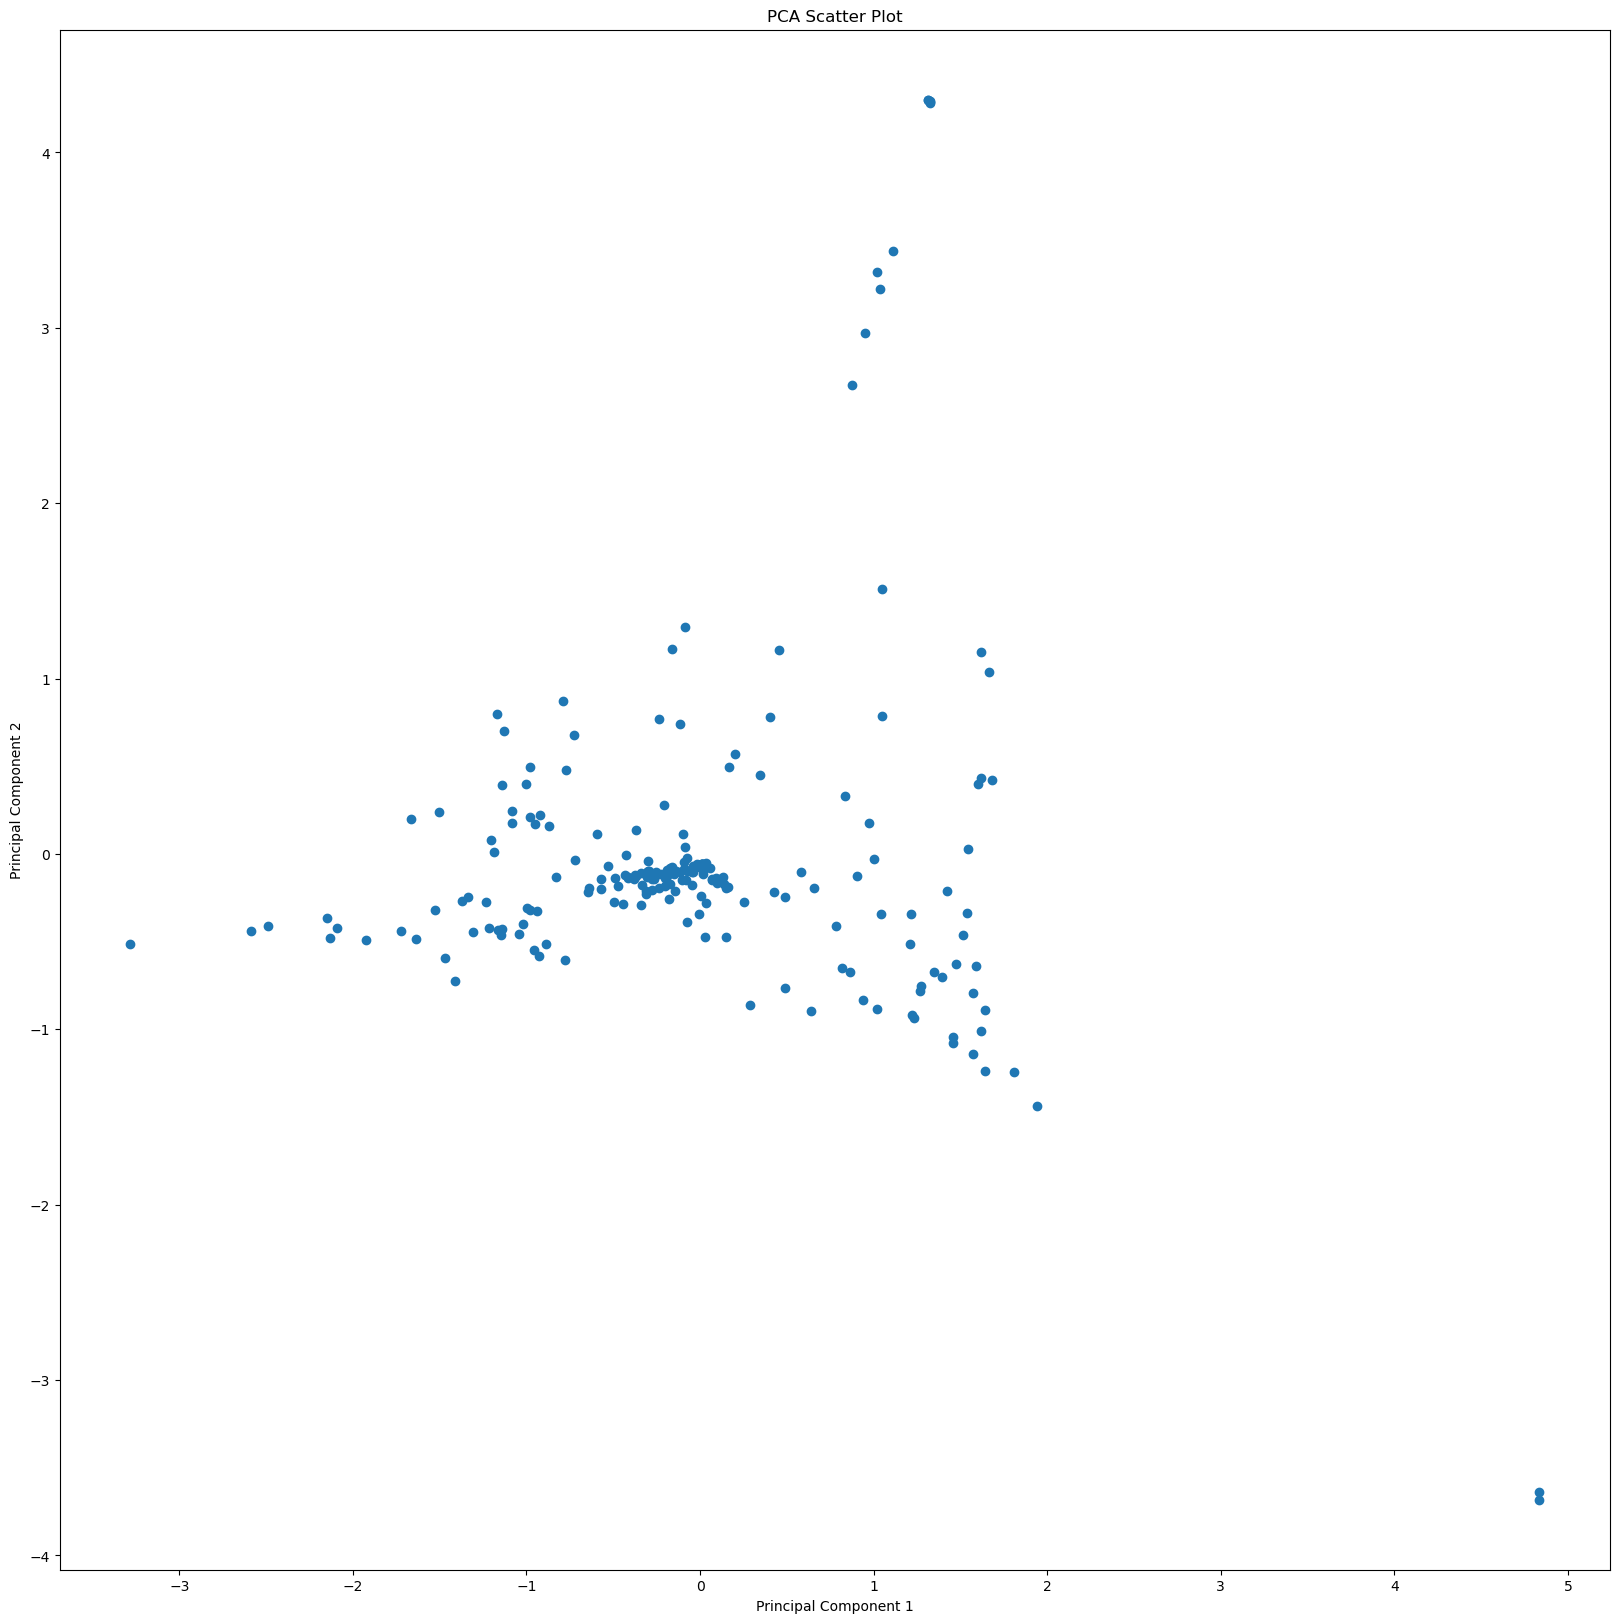

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')

# for i, category_label in enumerate(y):
#     plt.annotate(category_label, (x_pca[i, 0], x_pca[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')
plt.show()

In [116]:
import plotly.express as px

# Create a DataFrame with the PCA results
df = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
df['Category'] = y

# Create an interactive scatter plot with hover labels using Plotly
fig = px.scatter(df, x='Principal Component 1', y='Principal Component 2', hover_data=['Category'])

# Update the layout of the figure
fig.update_layout(
    title='PCA Scatter Plot',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
)

fig.update_layout(width=1300, height=1300)

# Display the figure
fig.show()